# Activation function investigation



### Plotting activation functions

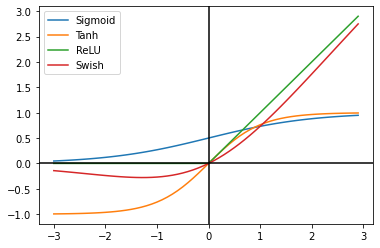

In [144]:
import numpy as np
import math

# Sigmoid Function
def sigmoid(x):
    a = []
    for i in x:
        a.append(1/(1+math.exp(-i)))
    return a
# Hyperbolic Tanjant Function
def tanh(x, derivative=False):
    if (derivative == True):
        return (1 - (x ** 2))
    return np.tanh(x)
# ReLU Function
def re(x):
    b = []
    for i in x:
        if i<0:
            b.append(0)
        else:
            b.append(i)
    return b
# Leaky ReLU Function

# Determining the intervals to be created for the graph
x = np.arange(-3., 3., 0.1)
sig = sigmoid(x)
tanh = tanh(x)
relu = re(x)
swish = sig*x

# Displaying the functions
line_1, = plt.plot(x,sig, label='Sigmoid')
line_2, = plt.plot(x,tanh, label='Tanh')
line_3, = plt.plot(x,relu, label='ReLU')
line_4, = plt.plot(x,swish, label='Swish')
plt.legend(handles=[line_1, line_2, line_3, line_4])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

### Loading data

In [101]:
# load numpy array from npy file
from numpy import load
# load array
x_train = load('./x_train_sample.npy')
# print the array
print(x_train[:5])

[[[[193. 188. 209.]
   [211. 206. 227.]
   [175. 170. 191.]
   ...
   [184. 178. 195.]
   [173. 167. 184.]
   [178. 172. 189.]]

  [[177. 172. 193.]
   [184. 179. 200.]
   [190. 185. 206.]
   ...
   [174. 168. 185.]
   [178. 172. 189.]
   [184. 178. 195.]]

  [[202. 197. 218.]
   [239. 234. 255.]
   [190. 185. 206.]
   ...
   [184. 178. 195.]
   [200. 192. 209.]
   [193. 185. 202.]]

  ...

  [[218. 210. 227.]
   [212. 204. 221.]
   [244. 236. 253.]
   ...
   [190. 180. 196.]
   [187. 177. 193.]
   [184. 174. 190.]]

  [[225. 215. 232.]
   [225. 215. 232.]
   [198. 188. 205.]
   ...
   [199. 189. 205.]
   [198. 188. 204.]
   [185. 175. 191.]]

  [[207. 197. 214.]
   [209. 199. 216.]
   [218. 208. 225.]
   ...
   [187. 177. 193.]
   [200. 190. 206.]
   [185. 175. 191.]]]


 [[[157. 156. 158.]
   [162. 161. 163.]
   [166. 163. 165.]
   ...
   [148. 147. 151.]
   [136. 137. 141.]
   [162. 163. 167.]]

  [[161. 160. 162.]
   [162. 161. 163.]
   [170. 167. 169.]
   ...
   [142. 141. 145.]
 

In [102]:
x_test = load('./x_test_sample.npy')
y_train = load('./y_train_sample.npy')
y_test = load('./y_test_sample.npy')

### Fitting models

In [104]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras import regularizers

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

from timeit import default_timer as timer


In [105]:
batch_size = 128 # Batch-Size
num_classes = 15 # Number of Class
epochs = 20 # Number of epoch
w_l2 = 1e-5 # Initial

In [106]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [107]:
input_shape = (32, 32, 3)

In [108]:
#Sigmoid

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_18 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 activation_18 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_19 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 activation_19 (Activation)  (None, 28, 28, 64)       

In [109]:
start = timer()
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
end = timer()

score = model.evaluate(x_test, y_test, verbose=0)


print('Test loss:', score[0])
print('Test accuracy:', score[1])

time_sigmoid = end - start 
print('Time to run', time_sigmoid, ' seconds')

Epoch 1/20
10/10 [==============================] - 11s 931ms/step - loss: 2.7052 - accuracy: 0.1583 - val_loss: 3.5906 - val_accuracy: 0.0800 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 8s 795ms/step - loss: 2.1782 - accuracy: 0.3042 - val_loss: 4.0815 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 9s 871ms/step - loss: 1.9531 - accuracy: 0.3733 - val_loss: 4.3527 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 7s 732ms/step - loss: 1.8534 - accuracy: 0.4342 - val_loss: 4.4753 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 7s 750ms/step - loss: 1.7557 - accuracy: 0.4817 - val_loss: 4.5763 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 8s 783ms/step - loss: 1.6517 - accuracy: 0.5150 - val_loss: 4.7822 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 8s 799ms/step - l

In [112]:
# Hyperbolic tangent 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_24 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 activation_24 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_25 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 activation_25 (Activation)  (None, 28, 28, 64)       

In [113]:
start = timer()

hist_tanh=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])

end = timer()

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

time_tanh = end - start 
print('Time to run', time_tanh, ' seconds')

Epoch 1/20
10/10 [==============================] - 13s 796ms/step - loss: 2.2813 - accuracy: 0.3300 - val_loss: 4.0529 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 7s 710ms/step - loss: 1.2729 - accuracy: 0.6000 - val_loss: 3.6751 - val_accuracy: 0.1200 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 9s 875ms/step - loss: 0.9306 - accuracy: 0.7308 - val_loss: 3.2310 - val_accuracy: 0.1900 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 8s 786ms/step - loss: 0.6996 - accuracy: 0.7992 - val_loss: 3.1098 - val_accuracy: 0.2600 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 8s 804ms/step - loss: 0.5122 - accuracy: 0.8775 - val_loss: 2.9171 - val_accuracy: 0.3067 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 9s 900ms/step - loss: 0.3774 - accuracy: 0.9267 - val_loss: 2.8968 - val_accuracy: 0.3033 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 9s 892ms/step - l

In [114]:
# Relu

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_27 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_28 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 activation_28 (Activation)  (None, 28, 28, 64)      

In [115]:
start = timer()

hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
end = timer()

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

time_relu = end - start 
print('Time to run', time_relu, ' seconds')

Epoch 1/20
10/10 [==============================] - 12s 737ms/step - loss: 2.4700 - accuracy: 0.2542 - val_loss: 36.9942 - val_accuracy: 0.0700 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 6s 635ms/step - loss: 1.4170 - accuracy: 0.5783 - val_loss: 25.6582 - val_accuracy: 0.0667 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 6s 637ms/step - loss: 1.0043 - accuracy: 0.7158 - val_loss: 15.7006 - val_accuracy: 0.1000 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 7s 680ms/step - loss: 0.7671 - accuracy: 0.8008 - val_loss: 10.8568 - val_accuracy: 0.0867 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 7s 693ms/step - loss: 0.5950 - accuracy: 0.8592 - val_loss: 6.9710 - val_accuracy: 0.1267 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 8s 759ms/step - loss: 0.4601 - accuracy: 0.9083 - val_loss: 3.8932 - val_accuracy: 0.2033 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 9s 869ms/step

In [116]:
# Swish 

def swish(x):
    return x * K.sigmoid(x)
    # return x * (1/(1 + K.exp(-x)))

In [117]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_30 (Bat  (None, 30, 30, 32)       128       
 chNormalization)                                                
                                                                 
 activation_30 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 batch_normalization_31 (Bat  (None, 28, 28, 64)       256       
 chNormalization)                                                
                                                                 
 activation_31 (Activation)  (None, 28, 28, 64)      

In [118]:
start = timer()

hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])

end = timer()

score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

time_swish = end - start 
print('Time to run', time_swish, ' seconds')

Epoch 1/20
10/10 [==============================] - 17s 1s/step - loss: 2.3467 - accuracy: 0.3017 - val_loss: 76.6252 - val_accuracy: 0.0767 - lr: 0.0010
Epoch 2/20
10/10 [==============================] - 9s 875ms/step - loss: 1.4368 - accuracy: 0.5592 - val_loss: 30.1274 - val_accuracy: 0.1267 - lr: 0.0010
Epoch 3/20
10/10 [==============================] - 9s 937ms/step - loss: 1.0577 - accuracy: 0.6958 - val_loss: 14.8684 - val_accuracy: 0.1200 - lr: 0.0010
Epoch 4/20
10/10 [==============================] - 9s 923ms/step - loss: 0.8129 - accuracy: 0.7967 - val_loss: 8.8604 - val_accuracy: 0.1500 - lr: 0.0010
Epoch 5/20
10/10 [==============================] - 9s 884ms/step - loss: 0.6046 - accuracy: 0.8658 - val_loss: 5.4774 - val_accuracy: 0.2367 - lr: 0.0010
Epoch 6/20
10/10 [==============================] - 9s 886ms/step - loss: 0.4438 - accuracy: 0.9233 - val_loss: 4.5389 - val_accuracy: 0.2067 - lr: 0.0010
Epoch 7/20
10/10 [==============================] - 9s 865ms/step - l

### Results

In [119]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_accuracy': 'valid. accuracy', 'accuracy': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(title[attribute])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'tanh', 'ReLU', 'Swish'], loc=loc)  

    plt.show()

In [120]:
hists = [hist_sigmoid, hist_tanh, hist_relu, hist_swish]

In [121]:
history_dict = hist_sigmoid.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


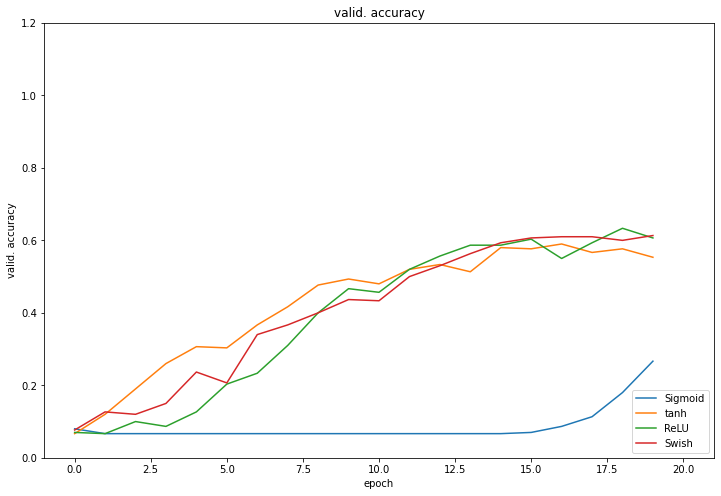

In [122]:
# Validation accuracy
plot_history(hists, attribute='val_accuracy',axis=(-1,21,0.0,1.2), loc='lower right')

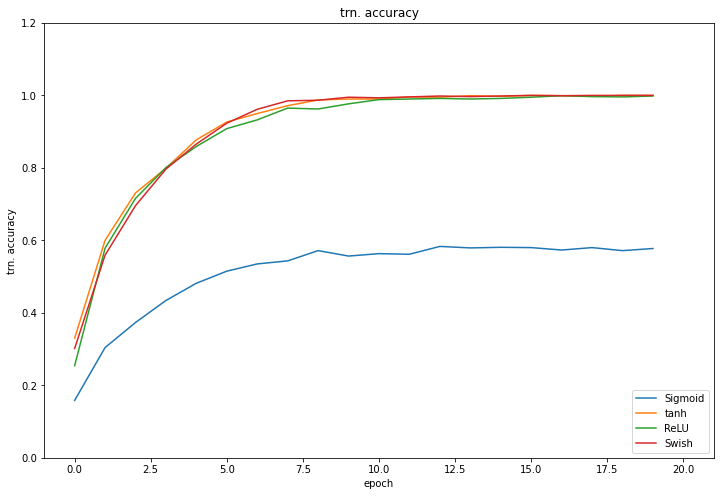

In [123]:
# train accuracy
plot_history(hists, attribute='accuracy', axis=(-1,21,0.0,1.2), loc='lower right')

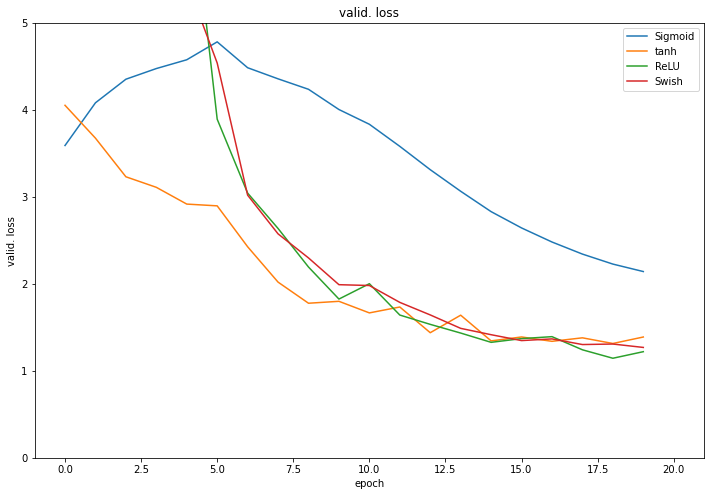

In [124]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.0,5), loc='upper right')

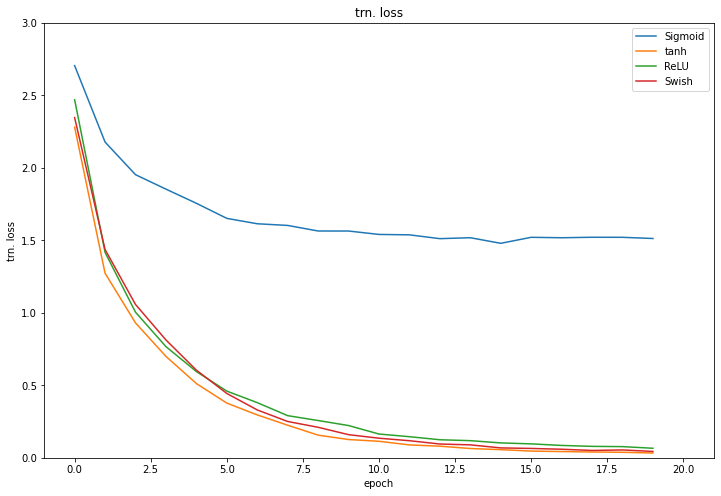

In [125]:
plot_history(hists, attribute='loss', axis=(-1,21,0.00,3), loc='upper right')

In [126]:
times = [time_sigmoid, time_tanh, time_relu, time_swish]

In [136]:
final_val_accuracy = []

for i in range(4):
    final_val_accuracy.append(hists[i].history['val_accuracy'][19])
    
print(final_val_accuracy)

[0.2666666805744171, 0.5533333420753479, 0.6066666841506958, 0.6133333444595337]


In [138]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(final_val_accuracy,times)
plt.show()

<Figure size 432x288 with 0 Axes>

Text(0, 0.5, 'Validation accuracy')

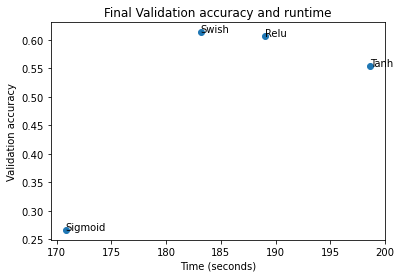

In [141]:

n = ['Sigmoid', 'Tanh', 'Relu', 'Swish']

fig, ax = plt.subplots()
ax.scatter(times, final_val_accuracy)

for i, txt in enumerate(n):
    ax.annotate(txt, (times[i], final_val_accuracy[i]))
    
plt.title("Final Validation accuracy and runtime")
plt.xlabel("Time (seconds)")
plt.ylabel("Validation accuracy")

### References 

1. https://towardsdatascience.com/comparison-of-activation-functions-for-deep-neural-networks-706ac4284c8a